In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from shared import Plot

In [2]:
# Get Iris data
"""
Features:
0 => sepal length in cm
1 => sepal width in cm
2 => petal length in cm
3 => petal width in cm


Target labels:
1 => Iris-Setosa
2 => Iris-Versicolor
3 => Iris-Virginica
"""
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
# Get training & test data
"""
Settings:
30 % for test, 70 % for training
"""
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [4]:
# Standarized
sc = StandardScaler()
sc.fit(X_train)  # Compute the mean and std to be used for later scaling
X_train_std = sc.transform(X_train)  # Standarized X_train
X_test_std = sc.transform(X_test)  # Standarized X_test

In [5]:
# Perceptron
"""
This is an One-vs.-Rest(OvR) Perceptron, able to classify 3 classes.
"""
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
# Prediction
y_pred = ppn.predict(X_test_std)
print('Misclassified samples : %d' % (y_test != y_pred).sum())

Misclassified samples : 4


In [7]:
# Scores
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))

Accuracy : 0.91


Plot results...


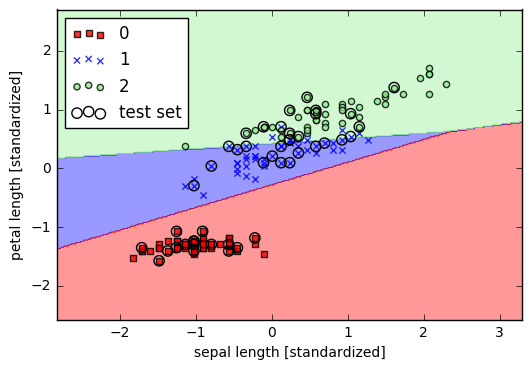

In [8]:
# Plot results
print('Plot results...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=ppn, test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [9]:
# Perceptron w/ SGD
"""
This is an One-vs.-Rest(OvR) Perceptron w/ SGD, able to classify 3 classes.
"""
ppn = SGDClassifier(loss='perceptron', n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', n_iter=40, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)

In [10]:
# Prediction
y_pred = ppn.predict(X_test_std)
print('Misclassified samples : %d' % (y_test != y_pred).sum())

Misclassified samples : 9


In [11]:
# Scores
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))

Accuracy : 0.80


Plot results...


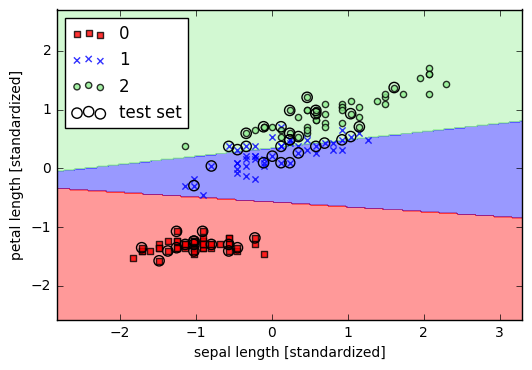

In [12]:
# Plot results
print('Plot results...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=ppn, test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()